In [1]:
import plotly.figure_factory as ff
import pandas as pd
import shapefile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sf = shapefile.Reader('../data/gadm36_CHN_shp/gadm36_CHN_2.shp')

In [3]:
geomet = sf.shapeRecords()
first = geomet[0]
first.shape.points
first.record

Record #-1: ['CHN', 'China', 'CHN.1_1', 'Anhui', '安徽|安徽', 'CHN.1.1_1', 'Anqing', 'Ānqìng', '安庆市', 'Dìjíshì', 'Prefecture City', '', '']

In [4]:
print(len(sf.shapes()))

344


In [5]:
shape_ex = sf.shape(5)

In [6]:
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

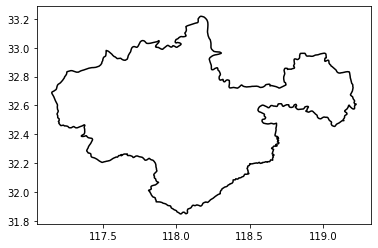

In [7]:
plt.plot(x_lon,y_lat,'k')

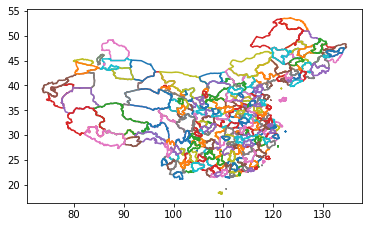

In [14]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(sf.iterShapes()):
    npoints = len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

        seg=shape.points[i0:i1+1]
        x_lon = np.zeros((len(seg),1))
        y_lat = np.zeros((len(seg),1))
        for ip in range(len(seg)):
            x_lon[ip] = seg[ip][0]
            y_lat[ip] = seg[ip][1]

        plt.plot(x_lon,y_lat)

plt.xlim()
plt.ylim()
plt.show()